In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud

def extract_file(file_name):
    file = pd.read_csv(file_name)
    return file

file_name = "C:/Users/hp/Desktop/Code/train data 6 games.csv"
dataframe = extract_file(file_name=file_name)
dataframe.head(5)

print(f'Rows: {dataframe.shape[0]} Columns: {dataframe.shape[1]}')

dataframe.info()


Rows: 240550 Columns: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240550 entries, 0 to 240549
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   app_id        240550 non-null  int64 
 1   app_name      240550 non-null  object
 2   review_text   240550 non-null  object
 3   review_score  240550 non-null  int64 
 4   review_votes  240550 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 9.2+ MB


In [3]:
dataframe[dataframe.isnull().any(axis=1)]

dataframe = dataframe.dropna()

print(dataframe.isnull().any(axis=1).sum())

dataframe.shape


0


(240550, 5)

In [4]:
list_app_id = dataframe['app_id'].unique().tolist()
print(f'Total number of games analyzed: {len(list_app_id)}')


Total number of games analyzed: 6


In [5]:
# Games with a value of 1 are recommended by the community. Games with -1 are not recommended by the community
review_games = pd.Series(dataframe['review_score'].value_counts())
review_games


review_score
 1    207444
-1     33106
Name: count, dtype: int64

In [6]:
# We can see that about 14% of the reviews do not recommend the listed games
pd.Series(dataframe['review_score'].value_counts(normalize=True))


review_score
 1    0.862374
-1    0.137626
Name: proportion, dtype: float64

In [7]:
# Reviews with a value of 0 are recommended by the community. Reviews with 1 are not recommended by the community
review_com = pd.Series(dataframe['review_votes'].value_counts())
review_com


review_votes
0    206911
1     33639
Name: count, dtype: int64

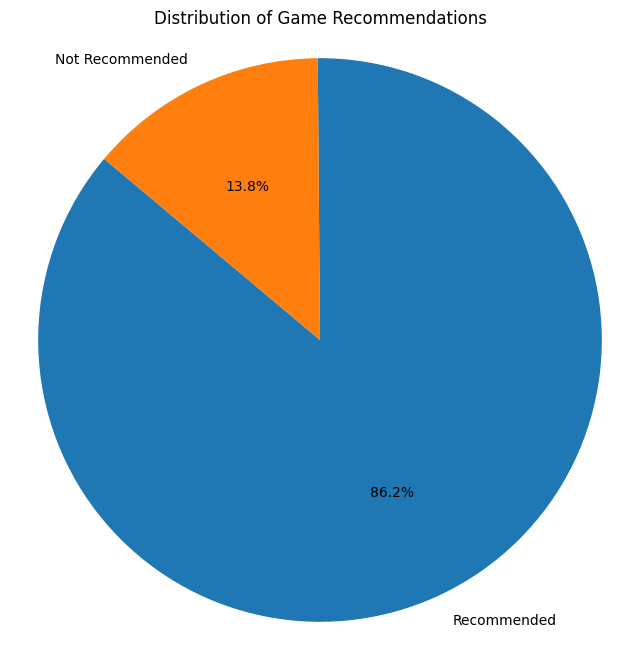

In [8]:
# Pie chart to show the total number of games recommended and not recommended by the community
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(review_games.values, labels=['Recommended', 'Not Recommended'], autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Game Recommendations')

# Show the pie chart
plt.axis('equal')  # Ensures that the pie chart is drawn as a circle
plt.show()


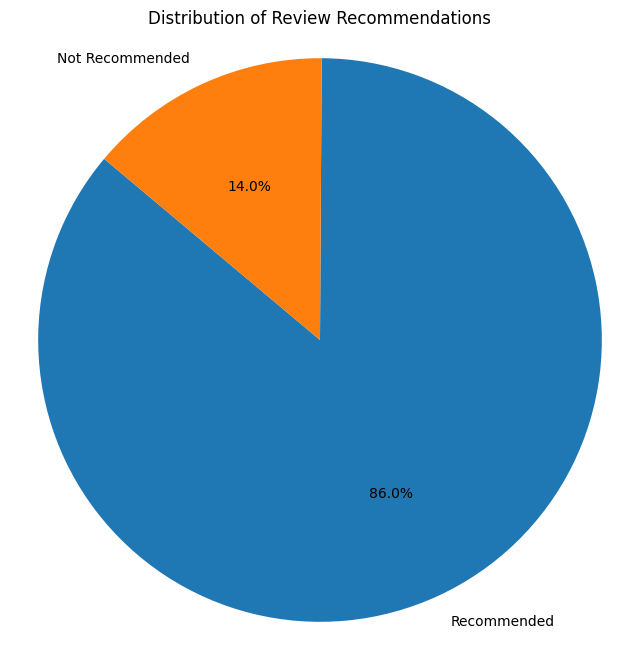

In [9]:
# Pie chart to show the total number of reviews recommended and not recommended by the community
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(review_com.values, labels=['Recommended', 'Not Recommended'], autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Review Recommendations')

# Show the pie chart
plt.axis('equal')  # Ensures that the pie chart is drawn as a circle
plt.show()


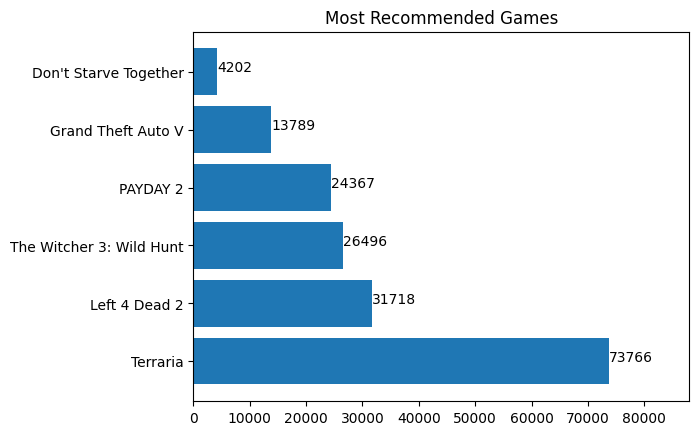

In [10]:
# games with the highest recommendation score (Horizontal bar chart)
top_games = dataframe.groupby('app_name')['review_score'].sum().nlargest(10)
plt.barh(top_games.index, top_games.values)
for i, value in enumerate(top_games.values):
    plt.text(value, i, str(value))
plt.xlim(0, 88000)
plt.title('Most Recommended Games')
plt.show()


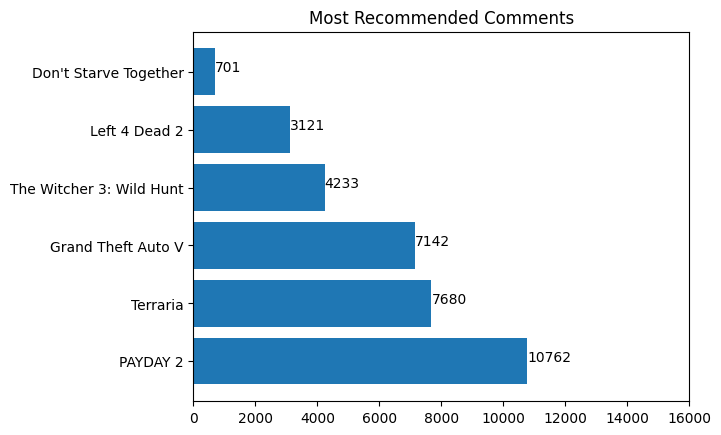

In [11]:
# Check the degree of recommendation of reviews within the most recommended games (Bar chart)
comments_top_games = dataframe.groupby('app_name')['review_votes'].sum().nlargest(10)
plt.barh(comments_top_games.index, comments_top_games.values)
for i, value in enumerate(comments_top_games.values):
    plt.text(value, i, str(value))
plt.xlim(0, 16000)
plt.title('Most Recommended Comments')
plt.show()



[nltk_data] Downloading package punkt to C:/nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to C:/nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


        app_id                  app_name  \
99529   218620                  PAYDAY 2   
85354   218620                  PAYDAY 2   
215046     550             Left 4 Dead 2   
20794   105600                  Terraria   
195496  292030  The Witcher 3: Wild Hunt   
143282  271590        Grand Theft Auto V   
23012   105600                  Terraria   
27652   105600                  Terraria   
170426  271590        Grand Theft Auto V   
5058    105600                  Terraria   

                                              review_text  review_score  \
99529   i give this game 'the test of time award' cos ...             1   
85354   To see this review, you must pay $2.99, you al...            -1   
215046                          Great game for the family             1   
20794   This masterpiece is probably my best purchase ...             1   
195496  Fun game, overwhelming for the first two hours...             1   
143282                             Best game of all time.        

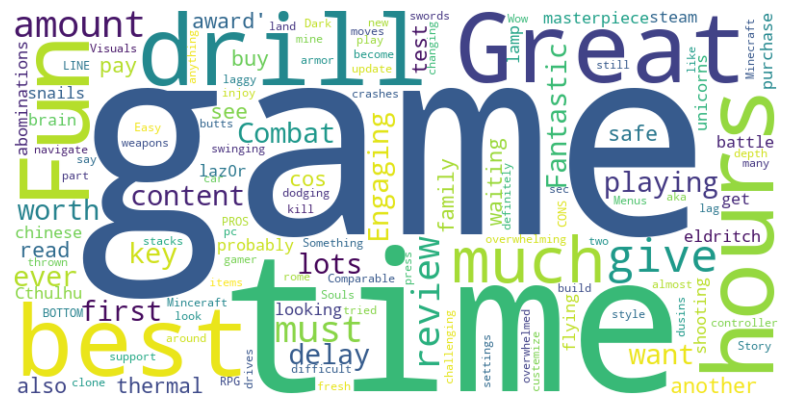

In [19]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Define the path and download NLTK data if not already done
nltk_data_path = 'C:/nltk_data'
nltk.data.path.append(nltk_data_path)
nltk.download('punkt', download_dir=nltk_data_path)
nltk.download('stopwords', download_dir=nltk_data_path)

# Load stopwords
stop_words = set(stopwords.words('english'))

# Define SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Sample data
dataframe_sentiments = dataframe.sample(n=10, random_state=42)

# Function to tokenize using spaCy
def spacy_tokenize(text):
    return [token.text for token in nlp(text) if token.is_alpha]

# Analyze sentiment
sentiments = []
for review in dataframe_sentiments['review_text']:
    tokens = spacy_tokenize(review.lower())
    filtered_tokens = [word for word in tokens if word not in stop_words]
    sentiment_score = sid.polarity_scores(' '.join(filtered_tokens))
    if sentiment_score['compound'] >= 0.05:
        sentiment = 'positive'
    elif sentiment_score['compound'] <= -0.05:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    sentiments.append(sentiment)

# Add sentiment to DataFrame
dataframe_sentiments['sentiment'] = sentiments
print(dataframe_sentiments.head(10))

# Generate Word Cloud
text = ' '.join(dataframe_sentiments['review_text'].astype(str))  # Combine all reviews into one string
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text)

# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
